In [2]:
#importing libraries

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier # combines prediction of various estimators to improve generisability
from sklearn.cross_validation import train_test_split
%matplotlib inline


C:\Users\swost\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#usimg pands to read database
data = pd.read_csv('mnist.csv')
#data has how become a pandas function.
'''The mnist_train.csv file contains the 60,000 training examples and labels. 
The mnist_test.csv contains 10,000 test examples and labels. 
Each row consists of 785 values: the first value is the label (a number from 0 to 9) 
and the remaining 784 values are the pixel values (a number from 0 to 255).'''

'The mnist_train.csv file contains the 60,000 training examples and labels. \nThe mnist_test.csv contains 10,000 test examples and labels. \nEach row consists of 785 values: the first value is the label (a number from 0 to 9) \nand the remaining 784 values are the pixel values (a number from 0 to 255).'

In [6]:
#viewing the database
#column heads
data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#The label value shows the number the pixels represent. The column before it represents the indexes of the position.

In [32]:
#extracting data
a=data.iloc[3,1:].values # the third row is chosen with pixels from all the columns.
#iloc[row indexes,column indexes]

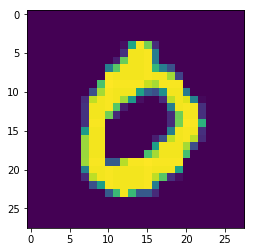

In [33]:
# reshaping into a resonable size
#reshaping needs to be in such a way such that the dimensions are factors of the total size of the array.
a = a.reshape(28,28).astype('uint8') # reshaped as 28x28. uint8 = unsigned integer value of 8-bit(range of pixel)-optional
plt.imshow(a)

In [29]:
#The output represents the actual image that the pixels if row 4 reprsent. 
#Now to train our model the label values aren't required. So we separate the labels from the pixels.

In [35]:
#preparing the data
#separating labels and data values
df_x = data.iloc[:,1:]#everything except labels
df_y = data.iloc[:,0]#only labels


In [38]:
#splitting data in test and train.

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)
#inbuilt function in sklearn. It spilts the data into test and train. The test_size represents the fraction of data splitting 
#random state represents randomisation in the splitting of data. There are various random states


In [44]:
#check data
x_train.head()
y_train.head()

4983    3
6789    1
2221    1
6043    5
1564    7
Name: label, dtype: int64

In [45]:
#Randomforest classifier works on the basis of decision trees. Here the number of decision trees is 100(nestimator)

In [46]:
#call rf classifier
rf = RandomForestClassifier(n_estimators=100)

In [48]:
#fit the model-training the model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
#prediction on test data
pred = rf.predict(x_test)

In [50]:
pred

array([1, 3, 7, ..., 0, 1, 0], dtype=int64)

In [51]:
#we gave the pixels to predict on and now we will compare the actual labels with the predition

In [61]:
#check prediction accuracy
s= y_test.values
#calculate number of correctly predicted values
total=len(pred)
count=0
for i in range(total):
    if pred[i] == s[i]:
        count+=1

In [62]:
#accuracy
count/total*100

94.55